# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.

![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)

If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_json('problem_set.json')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   critics score (percent)           1000 non-null   float64
 1   budget (millions)                 1000 non-null   float64
 2   length (minutes)                  1000 non-null   float64
 3   curse words used (rate per hour)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


<Axes: xlabel='budget (millions)', ylabel='critics score (percent)'>

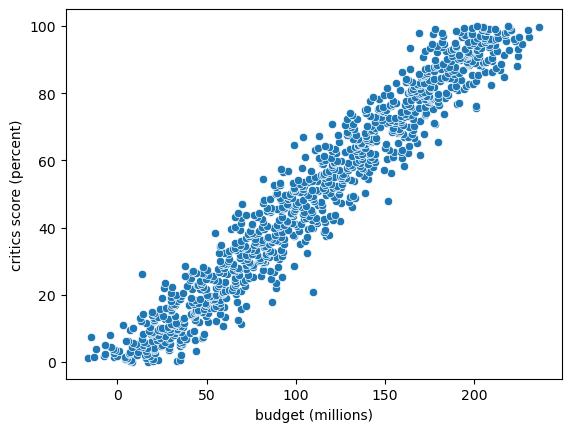

In [3]:
sns.scatterplot(data=df, x='budget (millions)', y='critics score (percent)')

In [5]:
df['budget']=df['budget (millions)']
df['critic']=df['critics score (percent)']

correlation=df['budget (millions)'].corr(df['critics score (percent)'])
correlation

0.9697766428756558

<p><b>Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">The budget and critics have a strong positive correlation, as the correlation is 0.9697766428756558. They also have a positive linear relationship, as can be seen on the scatterplot.</p>

In [8]:
def linreg(df, x, y, n=150):
    m, b=0, 0
    brs=float('inf')
    pm=(None, None)
    for i in range(n):
        df['pred']=m*df[x]+b
        df['res']=df[y]-df['pred']
        res_tot=(df['res']**2).sum()
        mg=-(2/len(df))*(df[x]*df['res']).sum()
        bg=-(2/len(df))*df['res'].sum()
        m-=0.000001*mg
        b-=0.000001*bg
        if res_tot<brs:
            bsr=res_tot
            pm=(m, b)
    return pm+(brs,)

linreg(df, 'budget', 'critic', 150)

(0.45251889687008684, 0.0030665096673459045, inf)

<p><b>Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">The equation I got for a line that best fits the budget and critics score is y = (0.45251889687008684)x + (0.0030665096673459045)</p>

<Axes: xlabel='budget', ylabel='critic'>

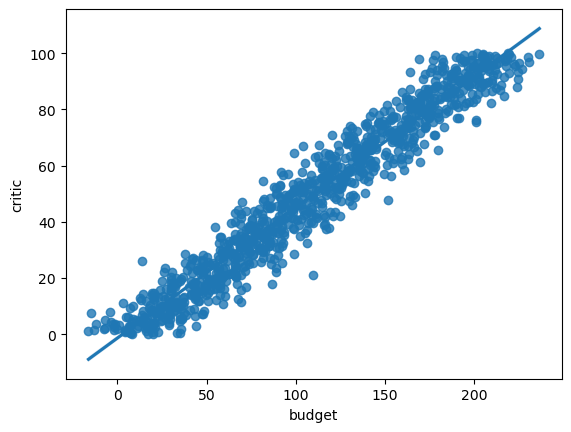

In [11]:
sns.regplot(data=df, x="budget", y="critic")

<p><b>Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">According to my line of best fit, the score a movie would receive if its budget was $10000000 could be</p>

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

<Axes: xlabel='length (minutes)', ylabel='critics score (percent)'>

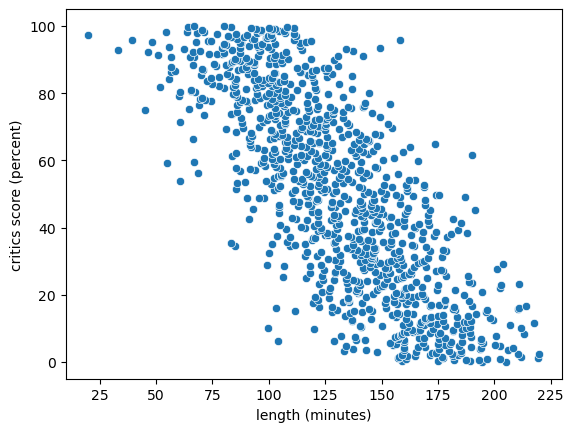

In [14]:
sns.scatterplot(data=df, x='length (minutes)', y='critics score (percent)')

In [16]:
correlationlcs=df['length (minutes)'].corr(df['critics score (percent)'])
correlationlcs

-0.7649508928065849

<p><b>Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">The length and critics score have a negative correlation of -0.7649508928065849, weaker than the budget and critic score, but the linear relationship between the two is still visible.</p>

In [19]:
def linreg(df, x, y, n=150):
    m, b=0, 0
    brs=float('inf')
    pm=(None, None)
    for i in range(n):
        df['pred']=m*df[x]+b
        df['res']=df[y]-df['pred']
        res_tot=(df['res']**2).sum()
        mg=-(2/len(df))*(df[x]*df['res']).sum()
        bg=-(2/len(df))*df['res'].sum()
        m-=0.000001*mg
        b-=0.000001*bg
        if res_tot<brs:
            bsr=res_tot
            pm=(m, b)
    return pm+(brs,)

linreg(df, 'length (minutes)', 'critic', 150)

(0.3144124693554306, 0.004906381926792074, inf)

<p><b>Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">The equation I got for a line that best fits the length and critics score is y = (0.3144124693554306)x + (0.004906381926792074)</p>

In [7]:
# Write the code you need for question 3 here.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

<Axes: xlabel='budget', ylabel='curse words used (rate per hour)'>

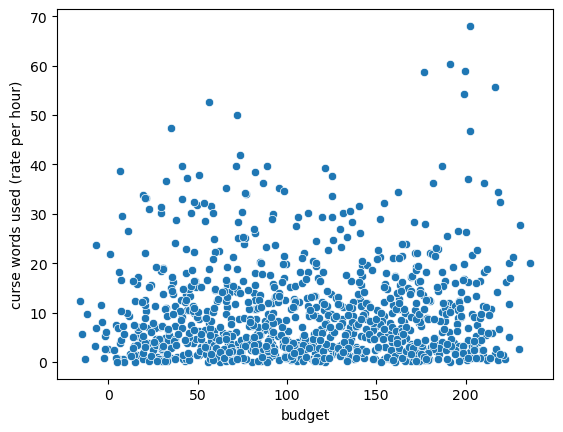

In [22]:
sns.scatterplot(data=df, x='budget', y='curse words used (rate per hour)')

In [24]:
correlationbc=df['budget (millions)'].corr(df['curse words used (rate per hour)'])
correlationbc

0.03546223671315379

<p><b>Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">There seems to be no correlation between the movie's budget and the amount of cursing in the movies. The points are scattered, and the correlation is 0.03546223671315379, further proving that the two have nothing to do with each other.</p>

In [29]:
def linreg(df, x, y, n=150):
    m, b=0, 0
    brs=float('inf')
    pm=(None, None)
    for i in range(n):
        df['pred']=m*df[x]+b
        df['res']=df[y]-df['pred']
        res_tot=(df['res']**2).sum()
        mg=-(2/len(df))*(df[x]*df['res']).sum()
        bg=-(2/len(df))*df['res'].sum()
        m-=0.000001*mg
        b-=0.000001*bg
        if res_tot<brs:
            bsr=res_tot
            pm=(m, b)
    return pm+(brs,)

linreg(df, 'budget (millions)', 'curse words used (rate per hour)', 150)

(0.06978426684428218, 0.0011228938924589945, inf)

<p><b>Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.</b></p>
<p style="font-family: Georgia; color: #635b9b;">The equation I got is y = (0.06978426684428218)x + (0.0011228938924589945)</p>

In [ ]:
# Write the code you need for question 3 here.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***